In [1]:
import torch
import matplotlib.pyplot as plt
import pyvista as pv
import json
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import glob 
pv.set_jupyter_backend('static')

OFFSET = 0 


In [2]:
def table_to_latex_row(dg):
    table_row = ""
    for record in dg[["MMD-CD","MMD-EMD"]].to_records(index=False):
        for idx in range(0,len(record),2):
            table_row += f'${record[idx]:,.2f} \pm {record[idx+1]:,.2f}$ & '

    table_row = table_row[:-2] + '\\\\'
    return table_row


# Reconstruction Results

In [3]:
fn = glob.glob("./results/**/**.json")
results = []
for filename in fn:
    with open(filename,"r") as f:
        results.extend(json.load(f))

df = pd.DataFrame(results)
df["MMD-CD"] = df["MMD-CD"] * 1e4
df["MMD-EMD"] = df["MMD-EMD"] * 1e3
df["normalized"] = df["normalized"].astype(str)



In [4]:
dg = df.groupby(["normalized","model","cate"]).agg(["mean","std"])
models = dg.index.get_level_values('model').unique().tolist()

In [5]:
print("Unnormalized results")
for model in models: 
    table_row = f"{model} &" + table_to_latex_row(dg.loc["False",model])
    print(table_row)

print("Normalized results")
for model in models: 
    table_row = f"{model} & " + table_to_latex_row(dg.loc["True",model])
    print(table_row)

Unnormalized results
Encoder &$1.32 \pm 0.00$ & $4.85 \pm 0.08$ & $7.35 \pm 0.01$ & $10.63 \pm 0.17$ & $14.78 \pm 0.04$ & $18.30 \pm 0.11$ \\
PointFlow &$1.30 \pm 0.00$ & $5.36 \pm 0.06$ & $6.94 \pm 0.01$ & $12.93 \pm 0.19$ & $10.43 \pm 0.02$ & $17.54 \pm 0.16$ \\
VAE &$1.67 \pm 0.01$ & $5.00 \pm 0.09$ & $10.27 \pm 0.06$ & $12.01 \pm 0.27$ & $15.96 \pm 0.07$ & $18.47 \pm 0.17$ \\
Normalized results
Encoder & $8.83 \pm 0.03$ & $31.63 \pm 0.48$ & $135.69 \pm 2.29$ & $66.44 \pm 0.41$ & $60.64 \pm 0.15$ & $73.06 \pm 0.39$ \\
PointFlow & $8.68 \pm 0.02$ & $35.19 \pm 0.72$ & $38.96 \pm 0.47$ & $66.99 \pm 0.72$ & $42.93 \pm 0.07$ & $70.55 \pm 0.43$ \\
VAE & $11.07 \pm 0.11$ & $32.81 \pm 0.59$ & $163.24 \pm 7.46$ & $75.53 \pm 1.71$ & $65.51 \pm 0.28$ & $73.56 \pm 0.51$ \\


# Encoder

### Airplane


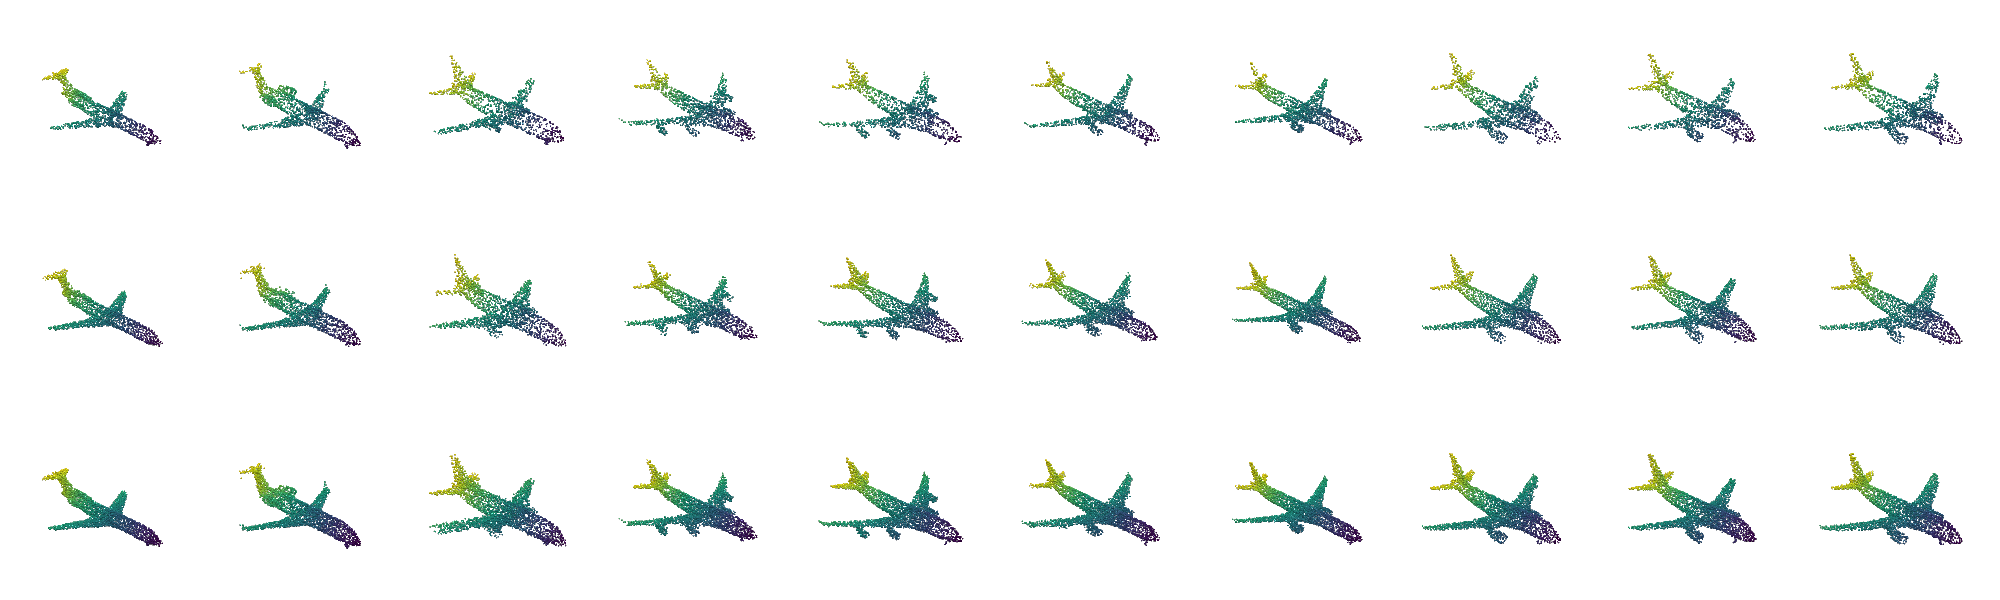

In [6]:
sample_pcs = torch.load('./results/Encoder/samples_airplane_normalized.pt')
ref_pcs = torch.load('./results/Encoder/ref_airplane_normalized.pt')
jnt = torch.cat([sample_pcs,ref_pcs],axis=1)

pl = pv.Plotter(shape=(3,10), window_size=[2000, 600],border=False,polygon_smoothing=True)

for col in range(10):
    points = ref_pcs[col+OFFSET].reshape(-1, 3).detach().cpu().numpy()
    pl.subplot(0, col)
    actor = pl.add_points(
        points,
        style="points",
        emissive=False,
        show_scalar_bar=False,
        render_points_as_spheres=True,
        scalars=points[:, 2],
        point_size=2,
        ambient=0.2, 
        diffuse=0.8, 
        specular=0.8,
        specular_power=40, 
        smooth_shading=True
    )
    points = sample_pcs[col+OFFSET].reshape(-1, 3).detach().cpu().numpy()
    pl.subplot(1, col)
    actor = pl.add_points(
        points,
        style="points",
        emissive=False,
        show_scalar_bar=False,
        render_points_as_spheres=True,
        scalars=points[:, 2],
        point_size=2,
        ambient=0.2, 
        diffuse=0.8, 
        specular=0.8,
        specular_power=40, 
        smooth_shading=True
    )
    points = jnt[col+OFFSET].reshape(-1, 3).detach().cpu().numpy()
    pl.subplot(2, col)
    actor = pl.add_points(
        points,
        style="points",
        emissive=False,
        show_scalar_bar=False,
        render_points_as_spheres=True,
        scalars=points[:, 2],
        point_size=2,
        ambient=0.2, 
        diffuse=0.8, 
        specular=0.8,
        specular_power=40, 
        smooth_shading=True
    )


pl.background_color = "w"
pl.link_views()
pl.camera_position = "xy"
pos = pl.camera.position
pl.camera.position = (pos[0],pos[1]+3,pos[2])
pl.camera.position = (6,0,0)
pl.camera.azimuth = 45
pl.camera.elevation = 30
# create a top down light
light = pv.Light(position=(0, 0, 0), positional=True,
                cone_angle=50, exponent=20, intensity=.2)
pl.add_light(light)
pl.camera.zoom(1.3)
pl.show()

### Car

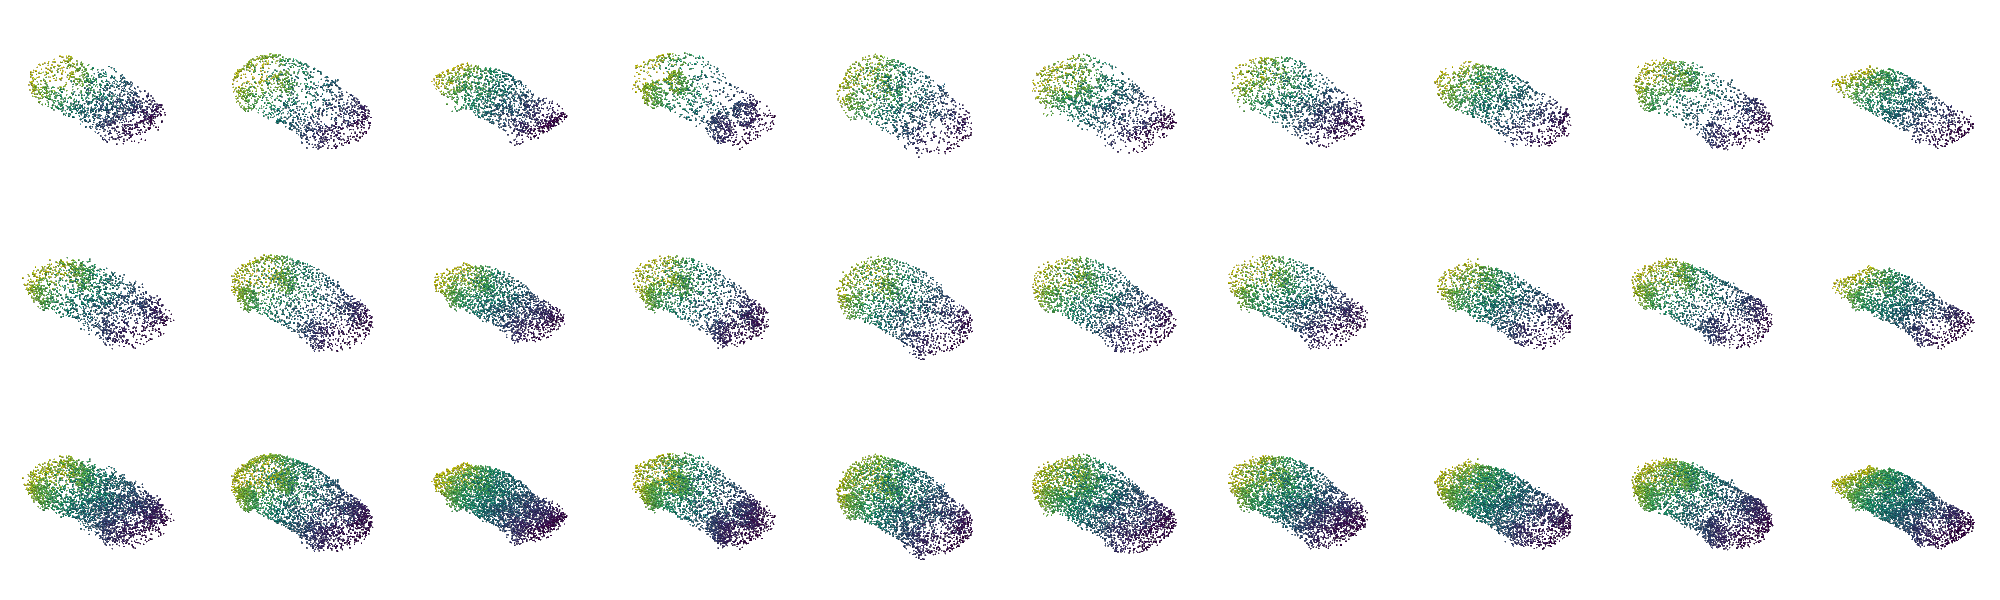

In [7]:
sample_pcs = torch.load('./results/Encoder/samples_car_normalized.pt')
ref_pcs = torch.load('./results/Encoder/ref_car_normalized.pt')
jnt = torch.cat([sample_pcs,ref_pcs],axis=1)

pl = pv.Plotter(shape=(3,10), window_size=[2000, 600],border=False,polygon_smoothing=True)

for col in range(10):
    points = ref_pcs[col+OFFSET].reshape(-1, 3).detach().cpu().numpy()
    pl.subplot(0, col)
    actor = pl.add_points(
        points,
        style="points",
        emissive=False,
        show_scalar_bar=False,
        render_points_as_spheres=True,
        scalars=points[:, 2],
        point_size=2,
        ambient=0.2, 
        diffuse=0.8, 
        specular=0.8,
        specular_power=40, 
        smooth_shading=True
    )
    points = sample_pcs[col+OFFSET].reshape(-1, 3).detach().cpu().numpy()
    pl.subplot(1, col)
    actor = pl.add_points(
        points,
        style="points",
        emissive=False,
        show_scalar_bar=False,
        render_points_as_spheres=True,
        scalars=points[:, 2],
        point_size=2,
        ambient=0.2, 
        diffuse=0.8, 
        specular=0.8,
        specular_power=40, 
        smooth_shading=True
    )
    points = jnt[col+OFFSET].reshape(-1, 3).detach().cpu().numpy()
    pl.subplot(2, col)
    actor = pl.add_points(
        points,
        style="points",
        emissive=False,
        show_scalar_bar=False,
        render_points_as_spheres=True,
        scalars=points[:, 2],
        point_size=2,
        ambient=0.2, 
        diffuse=0.8, 
        specular=0.8,
        specular_power=40, 
        smooth_shading=True
    )


pl.background_color = "w"
pl.link_views()
pl.camera_position = "xy"
pos = pl.camera.position
pl.camera.position = (pos[0],pos[1]+3,pos[2])
pl.camera.position = (6,0,0)
pl.camera.azimuth = 45
pl.camera.elevation = 30
# create a top down light
light = pv.Light(position=(0, 0, 0), positional=True,
                cone_angle=50, exponent=20, intensity=.2)
pl.add_light(light)
pl.camera.zoom(1.3)
pl.show()

### Chair

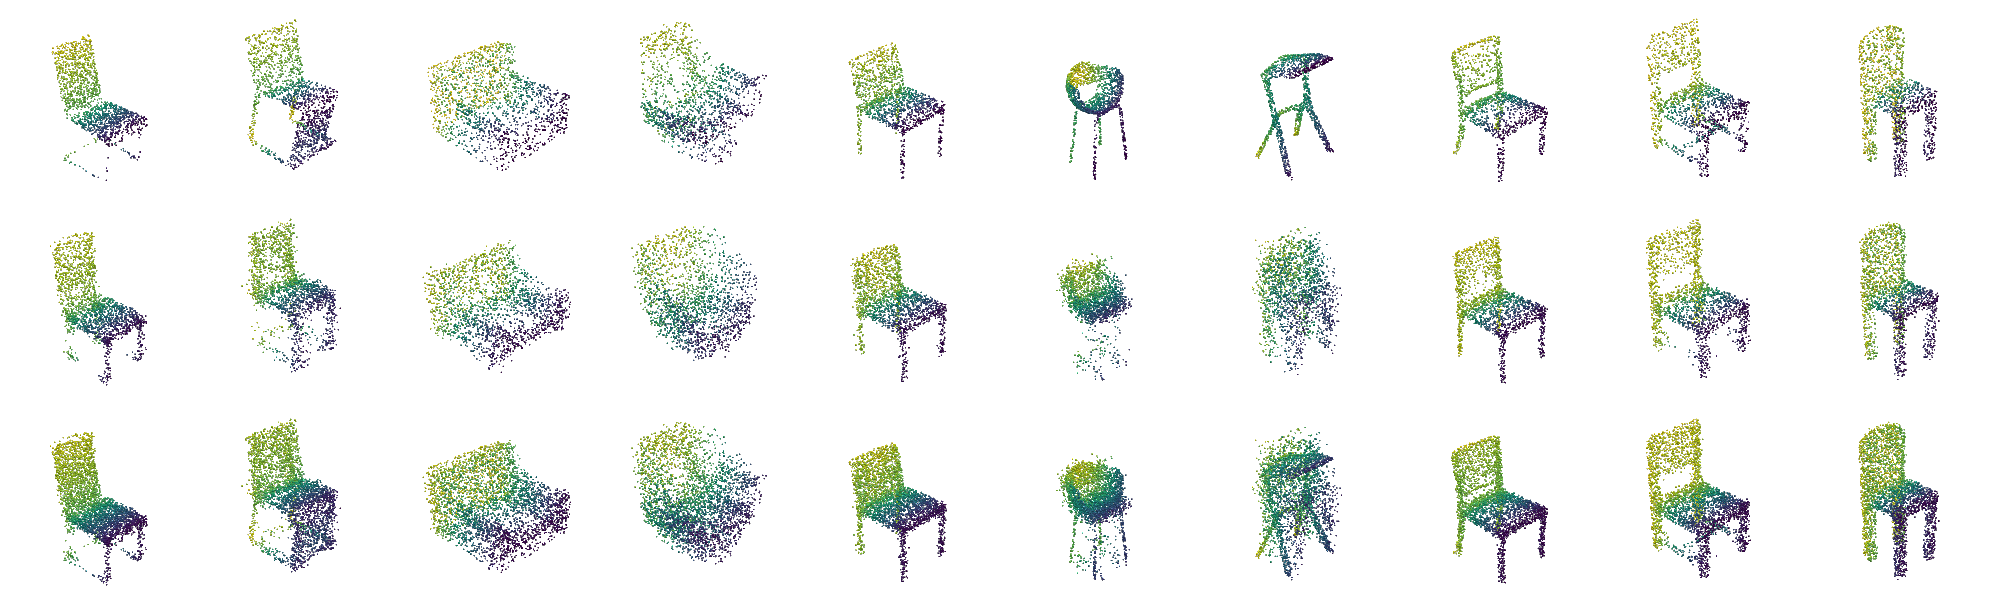

In [8]:
sample_pcs = torch.load('./results/Encoder/samples_chair_normalized.pt')
ref_pcs = torch.load('./results/Encoder/ref_chair_normalized.pt')
jnt = torch.cat([sample_pcs,ref_pcs],axis=1)

pl = pv.Plotter(shape=(3,10), window_size=[2000, 600],border=False,polygon_smoothing=True)

for col in range(10):
    points = ref_pcs[col+OFFSET].reshape(-1, 3).detach().cpu().numpy()
    pl.subplot(0, col)
    actor = pl.add_points(
        points,
        style="points",
        emissive=False,
        show_scalar_bar=False,
        render_points_as_spheres=True,
        scalars=points[:, 2],
        point_size=2,
        ambient=0.2, 
        diffuse=0.8, 
        specular=0.8,
        specular_power=40, 
        smooth_shading=True
    )
    points = sample_pcs[col+OFFSET].reshape(-1, 3).detach().cpu().numpy()
    pl.subplot(1, col)
    actor = pl.add_points(
        points,
        style="points",
        emissive=False,
        show_scalar_bar=False,
        render_points_as_spheres=True,
        scalars=points[:, 2],
        point_size=2,
        ambient=0.2, 
        diffuse=0.8, 
        specular=0.8,
        specular_power=40, 
        smooth_shading=True
    )
    points = jnt[col+OFFSET].reshape(-1, 3).detach().cpu().numpy()
    pl.subplot(2, col)
    actor = pl.add_points(
        points,
        style="points",
        emissive=False,
        show_scalar_bar=False,
        render_points_as_spheres=True,
        scalars=points[:, 2],
        point_size=2,
        ambient=0.2, 
        diffuse=0.8, 
        specular=0.8,
        specular_power=40, 
        smooth_shading=True
    )


pl.background_color = "w"
pl.link_views()
pl.camera_position = "xy"
pos = pl.camera.position
pl.camera.position = (pos[0],pos[1]+3,pos[2])
pl.camera.position = (6,0,0)
pl.camera.azimuth = 45
pl.camera.elevation = 30
# create a top down light
light = pv.Light(position=(0, 0, 0), positional=True,
                cone_angle=50, exponent=20, intensity=.2)
pl.add_light(light)
pl.camera.zoom(1.3)
pl.show()

# VAE

### Airplane 

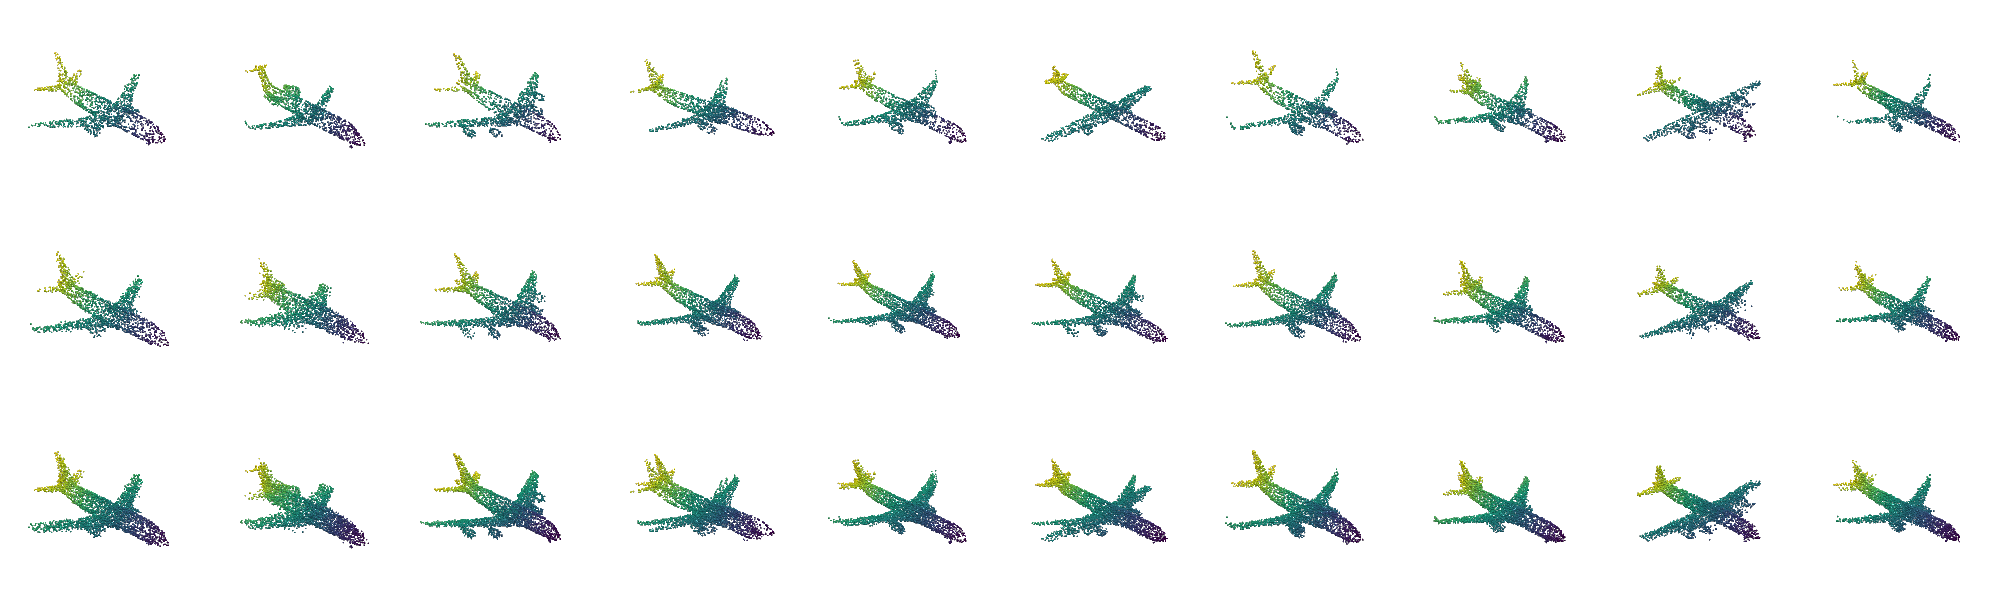

In [9]:
sample_pcs = torch.load('./results/VAE/samples_airplane_normalized.pt')
ref_pcs = torch.load('./results/VAE/ref_airplane_normalized.pt')
jnt = torch.cat([sample_pcs,ref_pcs],axis=1)

pl = pv.Plotter(shape=(3,10), window_size=[2000, 600],border=False,polygon_smoothing=True)

for col in range(10):
    points = ref_pcs[col+OFFSET].reshape(-1, 3).detach().cpu().numpy()
    pl.subplot(0, col)
    actor = pl.add_points(
        points,
        style="points",
        emissive=False,
        show_scalar_bar=False,
        render_points_as_spheres=True,
        scalars=points[:, 2],
        point_size=2,
        ambient=0.2, 
        diffuse=0.8, 
        specular=0.8,
        specular_power=40, 
        smooth_shading=True
    )
    points = sample_pcs[col+OFFSET].reshape(-1, 3).detach().cpu().numpy()
    pl.subplot(1, col)
    actor = pl.add_points(
        points,
        style="points",
        emissive=False,
        show_scalar_bar=False,
        render_points_as_spheres=True,
        scalars=points[:, 2],
        point_size=2,
        ambient=0.2, 
        diffuse=0.8, 
        specular=0.8,
        specular_power=40, 
        smooth_shading=True
    )
    points = jnt[col+OFFSET].reshape(-1, 3).detach().cpu().numpy()
    pl.subplot(2, col)
    actor = pl.add_points(
        points,
        style="points",
        emissive=False,
        show_scalar_bar=False,
        render_points_as_spheres=True,
        scalars=points[:, 2],
        point_size=2,
        ambient=0.2, 
        diffuse=0.8, 
        specular=0.8,
        specular_power=40, 
        smooth_shading=True
    )


pl.background_color = "w"
pl.link_views()
pl.camera_position = "xy"
pos = pl.camera.position
pl.camera.position = (pos[0],pos[1]+3,pos[2])
pl.camera.position = (6,0,0)
pl.camera.azimuth = 45
pl.camera.elevation = 30
# create a top down light
light = pv.Light(position=(0, 0, 0), positional=True,
                cone_angle=50, exponent=20, intensity=.2)
pl.add_light(light)
pl.camera.zoom(1.3)
pl.show()

# Car 

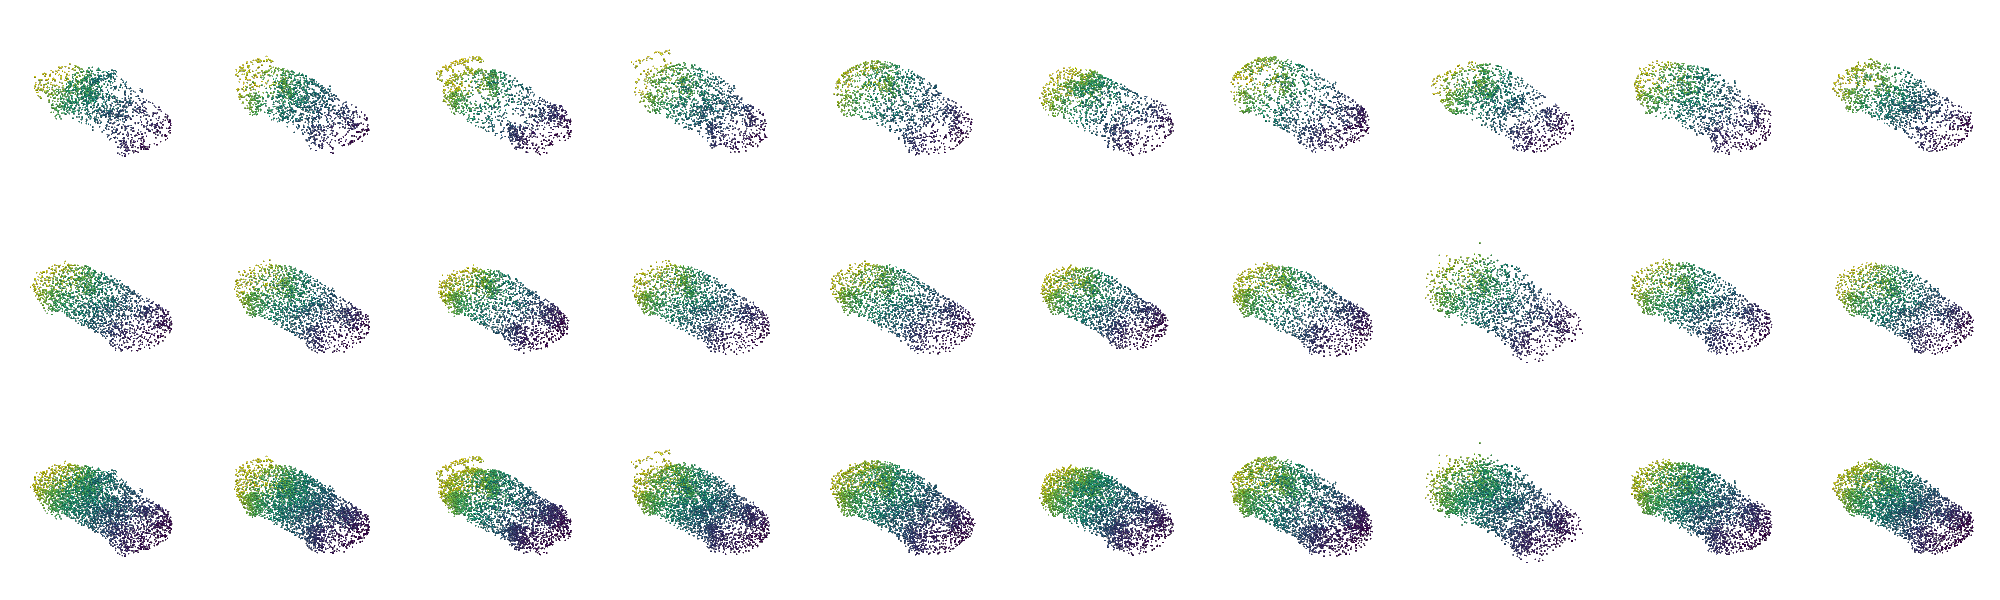

In [10]:
sample_pcs = torch.load('./results/VAE/samples_car_normalized.pt')
ref_pcs = torch.load('./results/VAE/ref_car_normalized.pt')
jnt = torch.cat([sample_pcs,ref_pcs],axis=1)

pl = pv.Plotter(shape=(3,10), window_size=[2000, 600],border=False,polygon_smoothing=True)

for col in range(10):
    points = ref_pcs[col+OFFSET].reshape(-1, 3).detach().cpu().numpy()
    pl.subplot(0, col)
    actor = pl.add_points(
        points,
        style="points",
        emissive=False,
        show_scalar_bar=False,
        render_points_as_spheres=True,
        scalars=points[:, 2],
        point_size=2,
        ambient=0.2, 
        diffuse=0.8, 
        specular=0.8,
        specular_power=40, 
        smooth_shading=True
    )
    points = sample_pcs[col+OFFSET].reshape(-1, 3).detach().cpu().numpy()
    pl.subplot(1, col)
    actor = pl.add_points(
        points,
        style="points",
        emissive=False,
        show_scalar_bar=False,
        render_points_as_spheres=True,
        scalars=points[:, 2],
        point_size=2,
        ambient=0.2, 
        diffuse=0.8, 
        specular=0.8,
        specular_power=40, 
        smooth_shading=True
    )
    points = jnt[col+OFFSET].reshape(-1, 3).detach().cpu().numpy()
    pl.subplot(2, col)
    actor = pl.add_points(
        points,
        style="points",
        emissive=False,
        show_scalar_bar=False,
        render_points_as_spheres=True,
        scalars=points[:, 2],
        point_size=2,
        ambient=0.2, 
        diffuse=0.8, 
        specular=0.8,
        specular_power=40, 
        smooth_shading=True
    )


pl.background_color = "w"
pl.link_views()
pl.camera_position = "xy"
pos = pl.camera.position
pl.camera.position = (pos[0],pos[1]+3,pos[2])
pl.camera.position = (6,0,0)
pl.camera.azimuth = 45
pl.camera.elevation = 30
# create a top down light
light = pv.Light(position=(0, 0, 0), positional=True,
                cone_angle=50, exponent=20, intensity=.2)
pl.add_light(light)
pl.camera.zoom(1.3)
pl.show()

# Chair

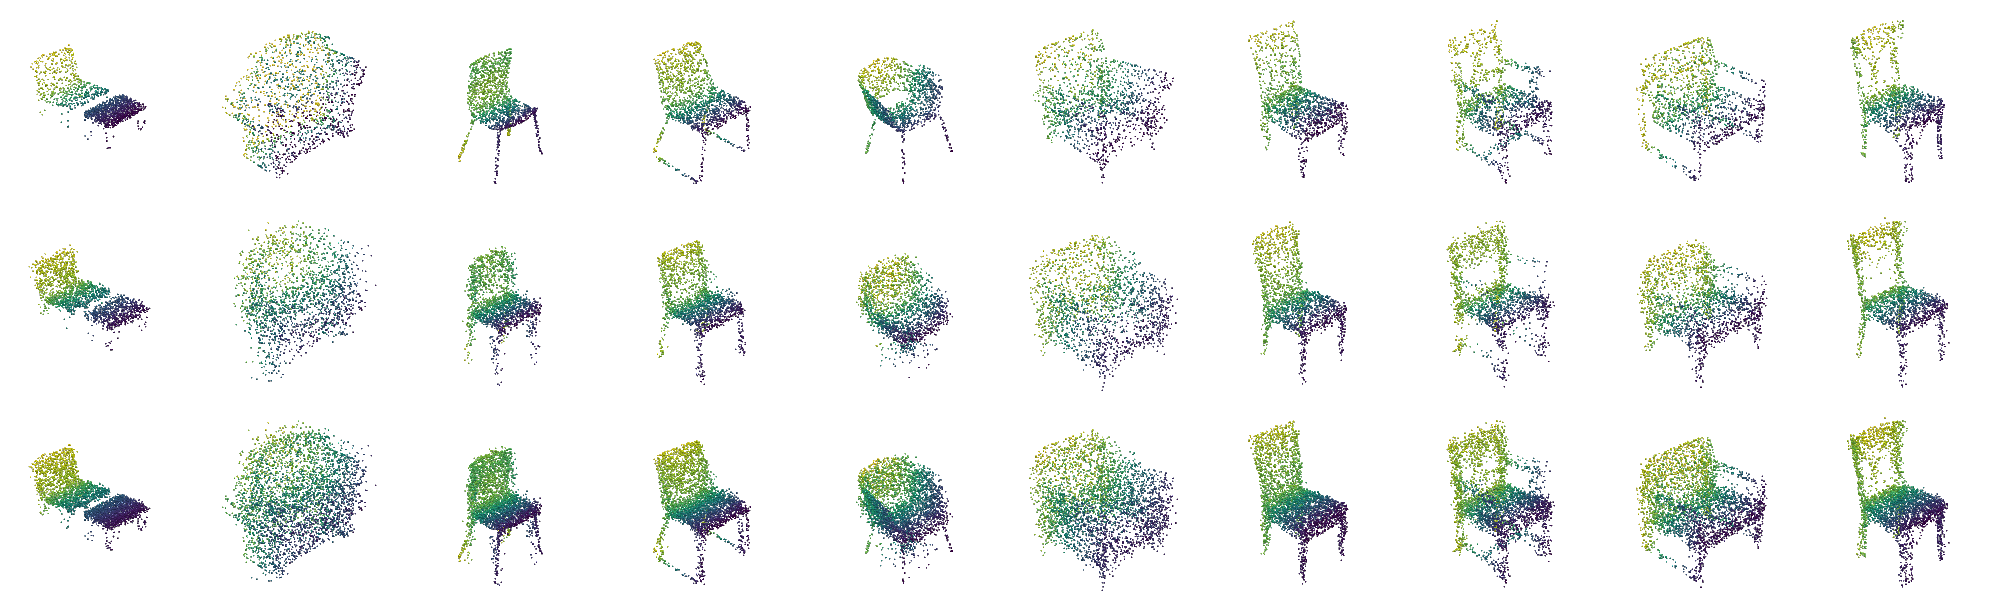

In [11]:
sample_pcs = torch.load('./results/VAE/samples_chair_normalized.pt')
ref_pcs = torch.load('./results/VAE/ref_chair_normalized.pt')
jnt = torch.cat([sample_pcs,ref_pcs],axis=1)

pl = pv.Plotter(shape=(3,10), window_size=[2000, 600],border=False,polygon_smoothing=True)

for col in range(10):
    points = ref_pcs[col+OFFSET].reshape(-1, 3).detach().cpu().numpy()
    pl.subplot(0, col)
    actor = pl.add_points(
        points,
        style="points",
        emissive=False,
        show_scalar_bar=False,
        render_points_as_spheres=True,
        scalars=points[:, 2],
        point_size=2,
        ambient=0.2, 
        diffuse=0.8, 
        specular=0.8,
        specular_power=40, 
        smooth_shading=True
    )
    points = sample_pcs[col+OFFSET].reshape(-1, 3).detach().cpu().numpy()
    pl.subplot(1, col)
    actor = pl.add_points(
        points,
        style="points",
        emissive=False,
        show_scalar_bar=False,
        render_points_as_spheres=True,
        scalars=points[:, 2],
        point_size=2,
        ambient=0.2, 
        diffuse=0.8, 
        specular=0.8,
        specular_power=40, 
        smooth_shading=True
    )
    points = jnt[col+OFFSET].reshape(-1, 3).detach().cpu().numpy()
    pl.subplot(2, col)
    actor = pl.add_points(
        points,
        style="points",
        emissive=False,
        show_scalar_bar=False,
        render_points_as_spheres=True,
        scalars=points[:, 2],
        point_size=2,
        ambient=0.2, 
        diffuse=0.8, 
        specular=0.8,
        specular_power=40, 
        smooth_shading=True
    )


pl.background_color = "w"
pl.link_views()
pl.camera_position = "xy"
pos = pl.camera.position
pl.camera.position = (pos[0],pos[1]+3,pos[2])
pl.camera.position = (6,0,0)
pl.camera.azimuth = 45
pl.camera.elevation = 30
# create a top down light
light = pv.Light(position=(0, 0, 0), positional=True,
                cone_angle=50, exponent=20, intensity=.2)
pl.add_light(light)
pl.camera.zoom(1.3)
pl.show()